# EDA, FE and  Support Vector Classifier(SVC) model 

## (Wine Quality Dataset)


*GitHub* : https://github.com/raviteja-padala/Machine-Learning-Algorithms

*Dataset*:  "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

*About the Data set*: The dataset describes the amount of various chemicals present in wine and their effect on it's quality score.Physicochemical tests, which are laboratory-based and take into account elements like acidity, pH level, sugar, and other chemical qualities, are an additional crucial component in the certification of red wine and the evaluation of its quality 


**Problem Statement**
To build a model to predict the quality of wine based on various chemicals data in the dataset using Support Vector Classifier(SVC) model.


*What is SVC in SVM?* 

SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes..


1. Exploratory Data Analysis and Feature Engineering

* Data Description
* Data Exploration
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling

2. Support Vector Classifier

* Support Vector Classifier
* Standardize Data
* Performance metrics for above models
* Increasing performance of model (Hyper-parameter Tuning)
* Creating Classification version of target variable and its performance metrics


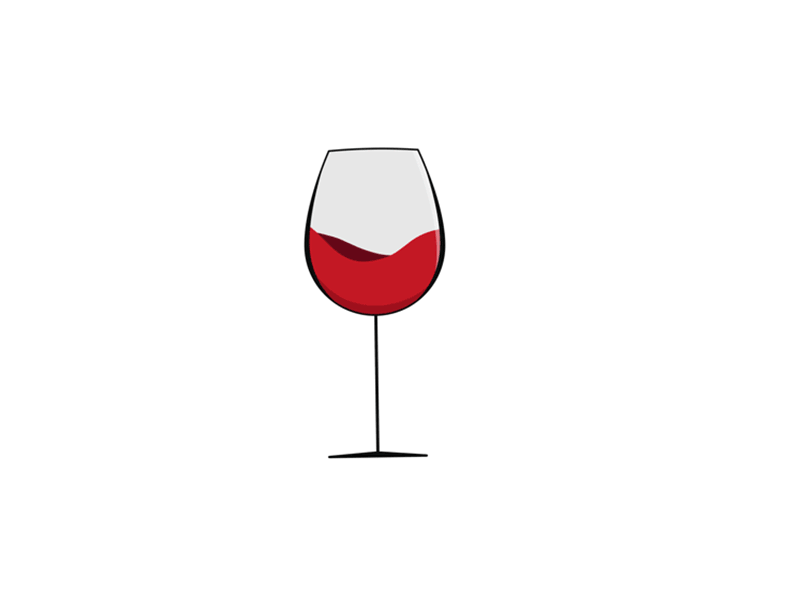

In [69]:
#importing libraries
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
#importing dataset

data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
#shape of data

data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# finding null values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
#determine the number of unique categories in each variable:

data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

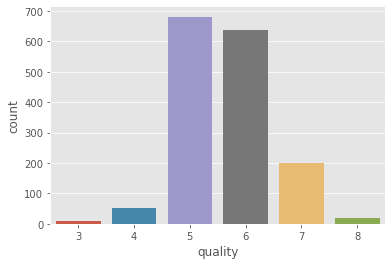

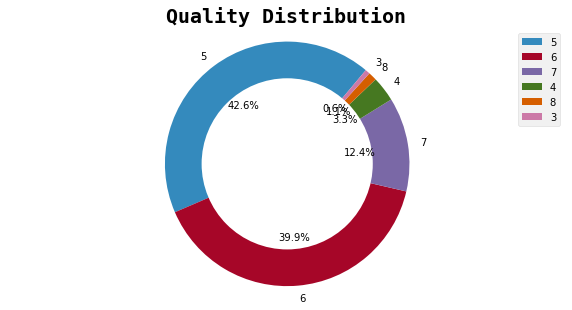

In [9]:
style.use('ggplot')
sns.countplot(data['quality'])

# Creating a donut chart for 'Quality'
quality_counts = data['quality'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.pie(quality_counts.values, labels = quality_counts.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Quality Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 10})
plt.show()


#### Observation:
* Quality scores 5 and 6 are recorded more number of times.

In [70]:
data.describe().T.style.background_gradient(cmap='Reds').set_precision(6)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


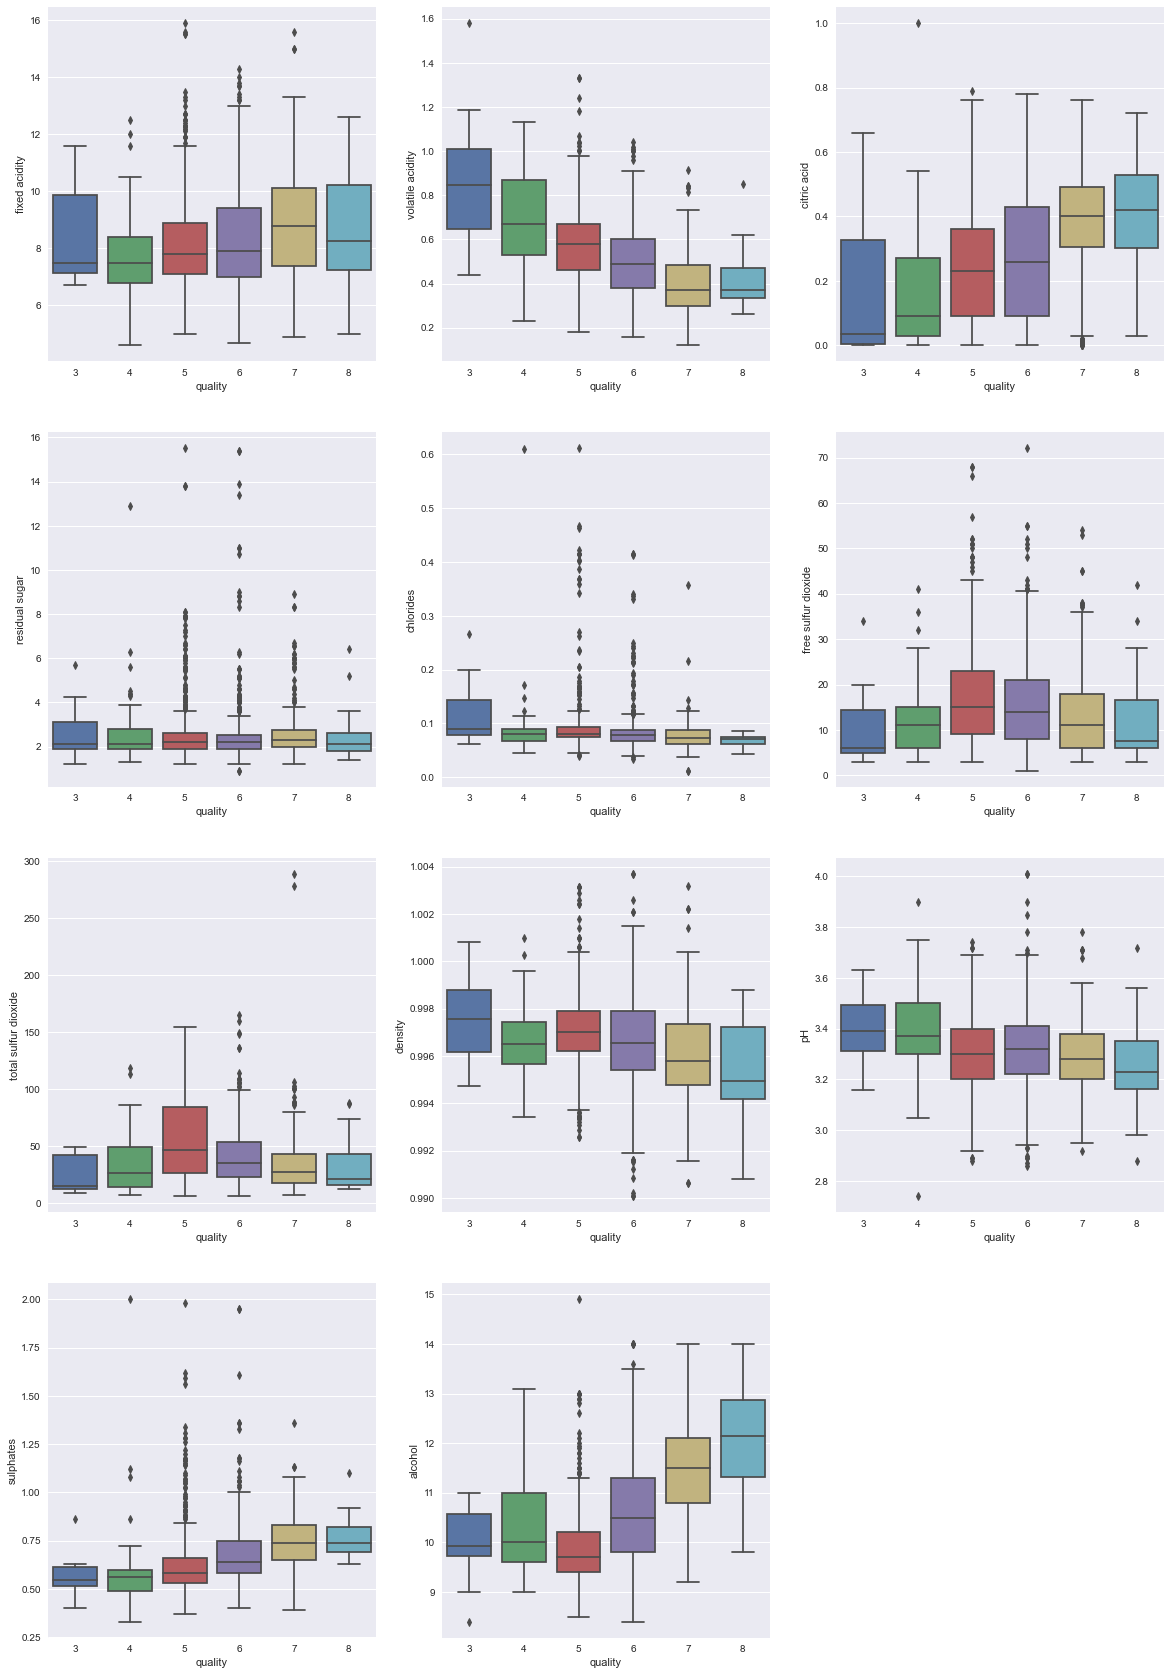

In [11]:
plt.style.use('seaborn')
fig,ax = plt.subplots(4,3,figsize=(20,30))
for i,j in enumerate(list(data.columns)[:-1]):
    sns.boxplot(x = data.quality,y = data[j],ax = ax[i//3][i%3])
plt.delaxes(ax[3,2])

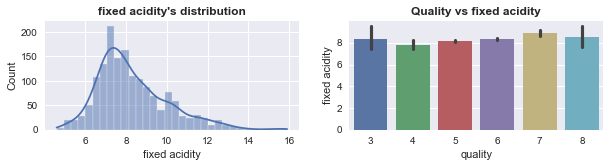

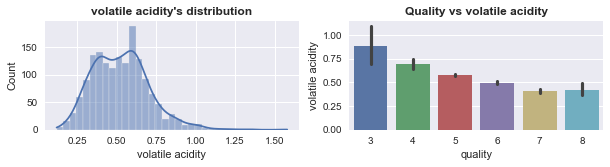

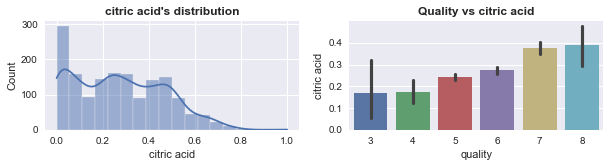

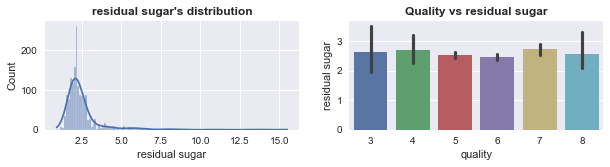

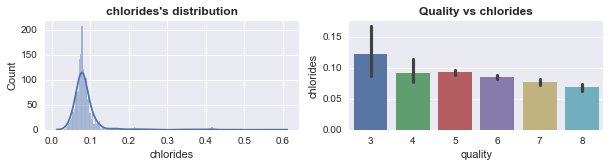

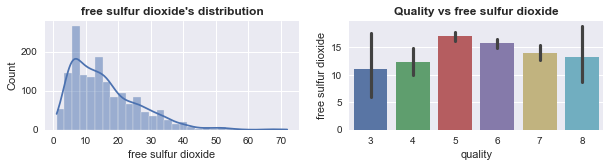

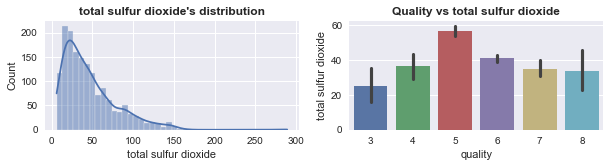

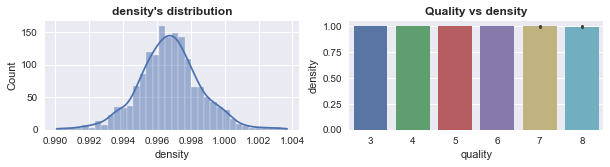

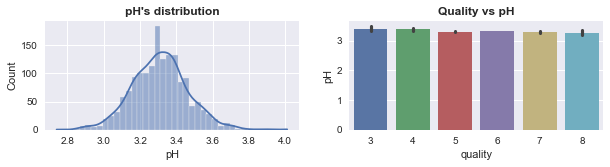

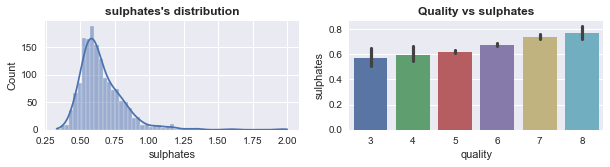

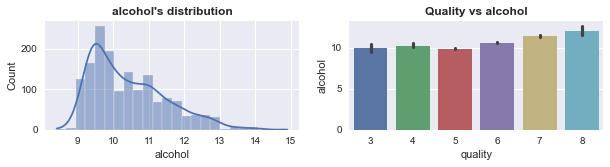

In [12]:
### Checking distribution of Continuous numerical features
data.features = data.drop(columns = ['quality'])


for i in data.features:
    plt.figure(figsize=(10,2))
    plt.subplot(121)
    sns.histplot(data=data, x=i, kde=True)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)  
    sns.barplot(x = 'quality', y = data.features[i], data = data)
    plt.title("Quality vs {}".format(i),fontweight="bold")

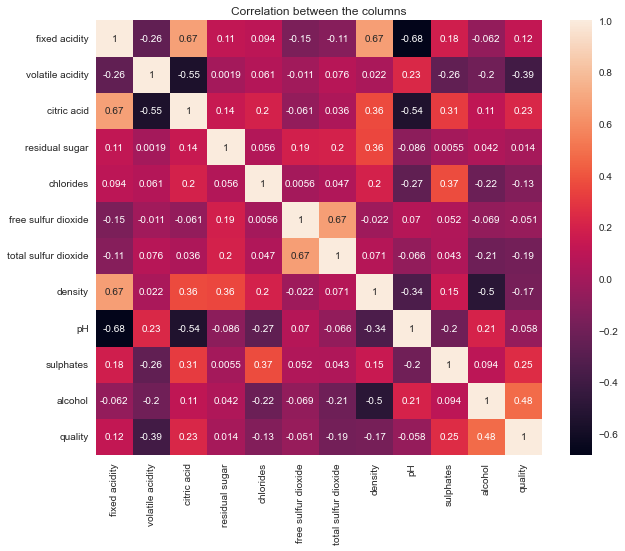

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation between the columns")
plt.show()

In [14]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

### Model building

In [15]:
X=data.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y=data["quality"]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### Train Test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [19]:
y_test.head()

803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64

In [20]:
### both X_train, y_train will have same shape


print("Shape of X train dataframe is", X_train.shape)
print("Shape of y train Series is", y_train.shape)

Shape of X train dataframe is (1119, 11)
Shape of y train Series is (1119,)


In [21]:
### both X_test, y_test will have same shape


print("Shape of X test dataframe is", X_test.shape)
print("Shape of y test Series is", y_test.shape)

Shape of X test dataframe is (480, 11)
Shape of y test Series is (480,)


### Using StandardScaler() Function to Standardize Data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Building SVC model

In [24]:
from sklearn.svm import SVC
svc = SVC()
svc

SVC()

In [25]:
svc.fit(X_train, y_train)

SVC()

In [26]:
pred_svc = svc.predict(X_test)
pred_svc

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [28]:
confusion_mat=confusion_matrix(y_test, pred_svc)
confusion_mat

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  14,   3,   0,   0],
       [  0,   0, 154,  40,   1,   0],
       [  0,   0,  75, 118,   7,   0],
       [  0,   0,   2,  44,  15,   0],
       [  0,   0,   0,   3,   3,   0]], dtype=int64)

In [29]:
acc=accuracy_score(y_test, pred_svc)
acc

0.5979166666666667

In [30]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.63      0.79      0.70       195
           6       0.57      0.59      0.58       200
           7       0.58      0.25      0.34        61
           8       0.00      0.00      0.00         6

    accuracy                           0.60       480
   macro avg       0.30      0.27      0.27       480
weighted avg       0.56      0.60      0.57       480



In [31]:
svc.score(X_train,y_train)

0.675603217158177

### Increasing performance of model (Hyper-parameter Tuning)

In [32]:
### using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model=SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    print("For kernel {} modal accuracy is {}".format(kernel, model.score(X_test, y_test)))

For kernel linear modal accuracy is 0.5604166666666667
For kernel rbf modal accuracy is 0.5979166666666667
For kernel poly modal accuracy is 0.5541666666666667
For kernel sigmoid modal accuracy is 0.4708333333333333


In [33]:
### for polynomial kernel with different degree of polynomial with constant hyper-parameter C
for degree in range(1,11):
    model=SVC(kernel='poly', degree=degree, C=100)
    model.fit(X_train, y_train)
    print("For degree {} model accuracy is {}".format(degree, model.score(X_test, y_test)))

For degree 1 model accuracy is 0.5604166666666667
For degree 2 model accuracy is 0.5333333333333333
For degree 3 model accuracy is 0.5458333333333333
For degree 4 model accuracy is 0.5479166666666667
For degree 5 model accuracy is 0.5729166666666666
For degree 6 model accuracy is 0.5333333333333333
For degree 7 model accuracy is 0.5270833333333333
For degree 8 model accuracy is 0.4791666666666667
For degree 9 model accuracy is 0.50625
For degree 10 model accuracy is 0.4708333333333333


In [34]:
#### using GridsearchCV to increase model efficiency by combining above parameters

from sklearn.model_selection import GridSearchCV

param_grid={'C':[i for i in range(1,100,10)], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4,5,6,7]}
grid=GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [40]:
### getting best parameters after gridsearchCV
print("Best parameters are {} for optimal accuracy.".format(grid.best_params_))

Best parameters are {'C': 11, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy.


In [41]:
### getting best accuracy after gridsearchCV
print("Best accuracy is {}".format(grid.score(X_test, y_test)))

Best accuracy is 0.63125


In [46]:
print("Accuracy of SVC without Hyperparameter Tuning is {}".format(accuracy_score(y_test, pred_svc)*100))

Accuracy of SVC without Hyperparameter Tuning is 59.791666666666664


In [50]:
print("Accuracy of SVC with Hyperparameter Tuning is {}".format(round(grid.score(X_test, y_test)*100,2)))


Accuracy of SVC with Hyperparameter Tuning is 63.12


In [57]:
print("Increase in accuracy is {}".format(round(grid.score(X_test, y_test)-accuracy_score(y_test, pred_svc),5)*100))

Increase in accuracy is 3.3329999999999997


## Creating Classification version of Target variable

In [35]:
# Creating Classification version of target variable

data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
X1 = data.drop(['quality','goodquality'], axis = 1)
y1 = data['goodquality']

In [36]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [61]:
from sklearn.svm import SVC
model = SVC()
model.fit(X1_train,y1_train)
pred_model = model.predict(X1_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y1_test,pred_model))
print("Test accuracy is : {:.2f}%".format(accuracy_score(y1_test,pred_model) * 100))

Accuracy Score: 0.8625
Test accuracy is : 86.25%


In [62]:
confusion_mat1=confusion_matrix(y1_test, pred_model)
confusion_mat1

array([[413,   0],
       [ 66,   1]], dtype=int64)

In [39]:
print(classification_report(y1_test, pred_y1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       451
           1       1.00      0.01      0.03        77

    accuracy                           0.86       528
   macro avg       0.93      0.51      0.47       528
weighted avg       0.88      0.86      0.79       528



In [63]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.866 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.897 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.848 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.888 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.884 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [64]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [65]:
grid_predictions = grid.predict(X1_test)

# print classification report
print(classification_report(y1_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       413
           1       0.94      0.22      0.36        67

    accuracy                           0.89       480
   macro avg       0.91      0.61      0.65       480
weighted avg       0.89      0.89      0.86       480



In [68]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",grid.score(X1_test, y1_test))
print("Test accuracy is : {:.2f}%".format(grid.score(X1_test, y1_test) * 100))

Accuracy Score: 0.8895833333333333
Test accuracy is : 88.96%
